# Task:1 Prediction using Supervised ML. 

# By:- Ayush Gupta

# Organisation:- The Sparks Foundation
# #Gripmar21

## Predict the percentage of an student based on the no. of study hours.
## This is a simple linear regression task as it involves just 2 variables.
##  Data can be found at http://bit.ly/w-data 


####  We have to predict a score  if a student studies for 9.25 hrs/ day .

In [1]:
# Importing all reruired libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# Import the dataset and read csv file.
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("The data is :-")     
data              

The data is :-


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# check the missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting the distribution of scores .

Text(0, 0.5, 'Score Percentage')

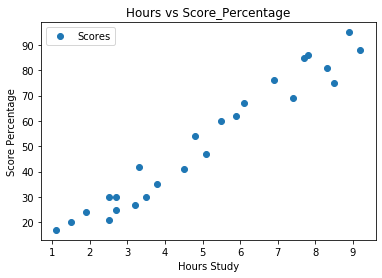

In [7]:
data.plot(x="Hours", y="Scores", style="o")
plt.title('Hours vs Score_Percentage')
plt.xlabel('Hours Study')
plt.ylabel('Score Percentage')

## Divide the data into attributes and lables

In [8]:
X=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Splitting the data into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


### Training the model

In [12]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_test)
print(y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Training the Algorithm

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


### Plotting the Regression line

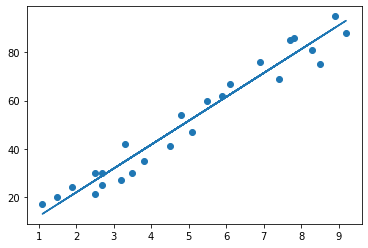

In [14]:
line = regressor.coef_*X + regressor.intercept_
#Ploting for the test data
plt.scatter(X,y)
plt.plot(X, line);
plt.show()


### check the accuracy of scores for training and test sets

In [15]:
print('Test Score is:-')
print(regressor.score(X_test, y_test))
print('Training Score is:-')
print(regressor.score(X_train, y_train))

Test Score is:-
0.9454906892105356
Training Score is:-
0.9515510725211553


### Making Predictions

In [16]:
print(X_test)
y_predict=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual VS Predicted

In [17]:
df= pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predict the score for 9.25 hours

In [18]:
print('Score of student who studied for 9.25 hours is: ', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours is:  [93.69173249]


### Evaluating the Model

In [19]:
mean_squ_error = mean_squared_error(y_test, y_predict)
mean_abs_error = mean_absolute_error(y_test, y_predict)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)


Mean Squred Error: 21.5987693072174
Mean absolute Error: 4.183859899002975
